ATTACKS PROJECT NOTEBOOK

In [78]:
#Import of the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import requests
import cartopy.crs as ccrs
import time
import cartopy.feature

In [75]:
df_attacks = pd.read_csv('attack_logs.csv')

Where are the suspect IP addresses located?

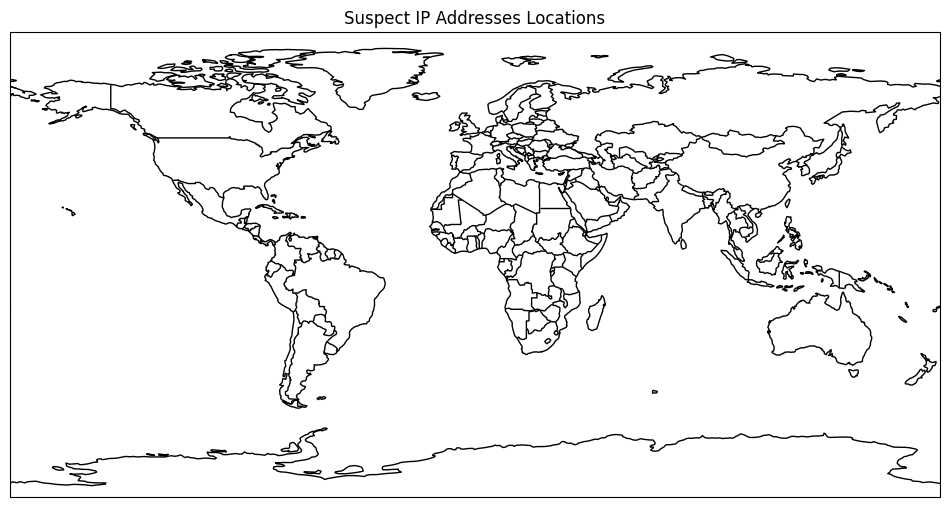

In [80]:
# CODE

def get_ip_details(ip):
    try:
        response = requests.get(f"http://ip-api.com/json/{ip}")
        data = response.json()
        return {'IP': ip, 'Country': data['country'], 'Lat': data['lat'], 'Lon': data['lon']} if data['status'] == 'success' else None
    except requests.RequestException:
        return None

unique_ips = df_attacks['Source IP'].unique()

# GET DETAILS FOR EACH IP
ip_details = []
for ip in unique_ips:
    details = get_ip_details(ip)
    if details:
        ip_details.append(details)
    time.sleep(1)

details_df = pd.DataFrame(ip_details)

# MAP CREATION WITH CARTOPY
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

# PLOTTING OF EACH IP LOCATION
for _, row in details_df.iterrows():
    ax.plot(row['Lon'], row['Lat'], 'bo', markersize=5)
    plt.text(row['Lon'], row['Lat'], row['IP'], fontsize=8, ha='right', transform=ccrs.Geodetic())

plt.title('Suspect IP Addresses Locations')
plt.show()

What is the attack that generated more packets?

In [53]:
# CODE

most_packets_attack = data['Attack Type'].value_counts().idxmax()
attack_counts = df_attacks['Attack Type'].value_counts()

In [54]:
# ANSWER

print(f"The attack that generated more packets: {most_packets_attack}")

The attack that generated more packets: ICMP-SMURF PACKET


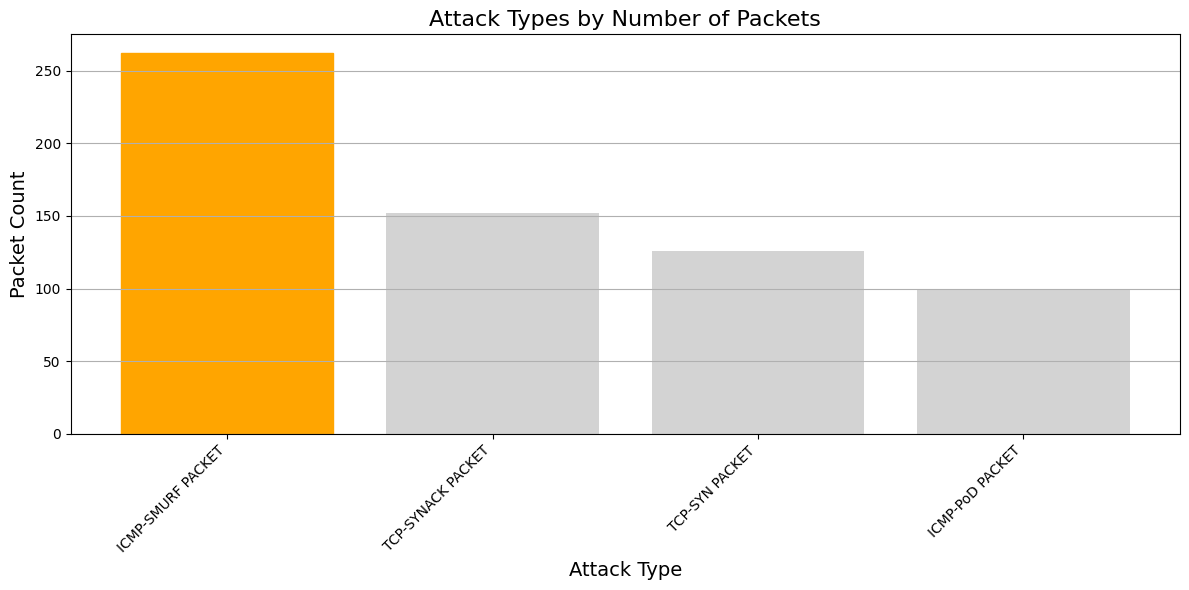

In [55]:
# PLOT

plt.figure(figsize=(12, 6))
bars = plt.bar(attack_counts.index, attack_counts.values, color='lightgray')

for bar in bars:
    if bar.get_x() + bar.get_width() / 2 == attack_counts.index.get_loc(most_packets_attack):
        bar.set_color('orange')

plt.title('Attack Types by Number of Packets', fontsize=16)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Packet Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

What is the attack that generated the largest traffic in terms of bytes?

In [56]:
# CODE

traffic_summary = df_attacks.groupby('Attack Type')['Packet Size'].sum()

most_traffic_attack = traffic_summary.idxmax()
most_traffic_size = traffic_summary.max()

In [57]:
# ANSWER

print(f"The attack that generated the largest traffic: {most_traffic_attack} ({most_traffic_size} bytes)")

The attack that generated the largest traffic: ICMP-PoD PACKET (147200.0 bytes)


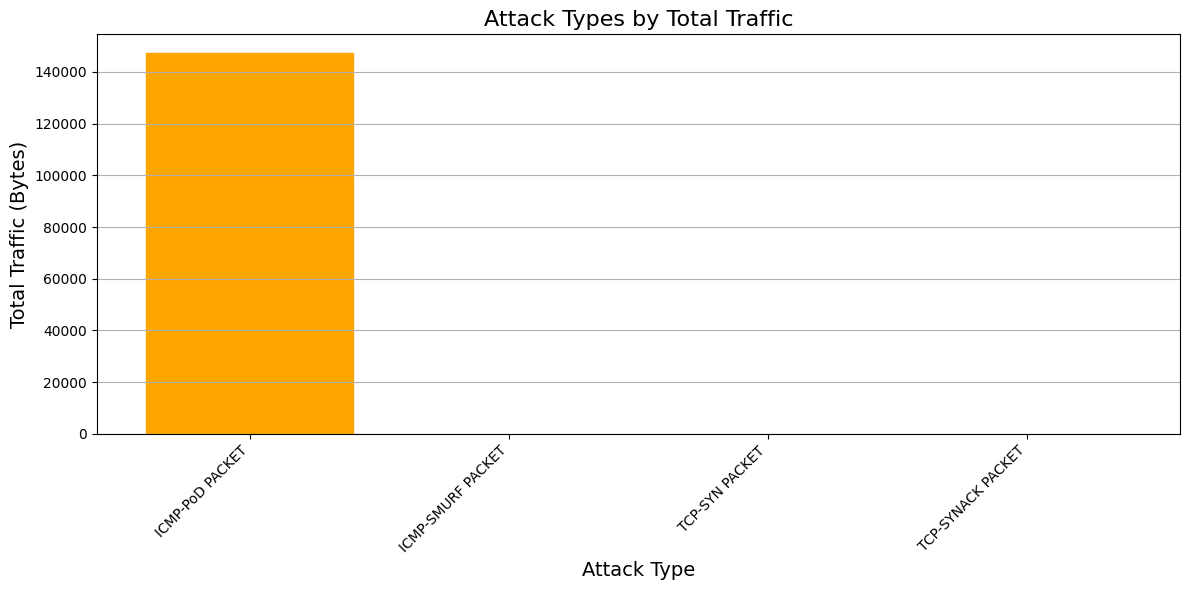

In [58]:
# PLOT

plt.figure(figsize=(12, 6))
bars = plt.bar(traffic_summary.index, traffic_summary.values, color='lightgray')

for bar in bars:
    if bar.get_x() + bar.get_width() / 2 == traffic_summary.index.get_loc(most_traffic_attack):
        bar.set_color('orange')

plt.title('Attack Types by Total Traffic', fontsize=16)
plt.xlabel('Attack Type', fontsize=14)
plt.ylabel('Total Traffic (Bytes)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.tight_layout()
plt.show()
